In [ ]:
# Finite difference methods hardcoded for the use on 1D and 2D heat equations

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

In [394]:
def ICfunc1D(x):
    soln = np.sin(2*np.pi*x)+2*np.sin(5*np.pi*x)
    return soln


def ICfunc(x,y):
    soln = 100
    return soln


def BCfunc(x):
    soln = 0
    return soln


    

## Euler 1D

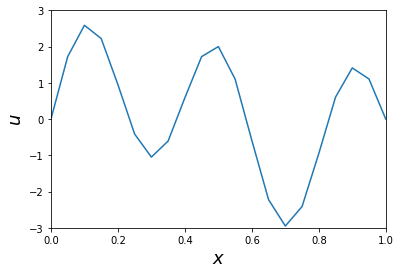

In [333]:
def heat_eq1DEuler(T,IC,BC1,M,N):
    '''
    T - time range [0,T]
    IC - initial condition
    BC1 - BC at x=0
    M - spacial nodes
    N - time nodes
    '''
    delta_t = float(T)/N
    delta_x = 1./M
    times  = np.arange(0,T+delta_t,delta_t)
    spaces  = np.arange(0,1+delta_x,delta_x)
    u = np.zeros((N+1,M+1))
    u[:,0] = BC1 
    u[:,M]= BC1
    u[0,1:M] = IC(spaces[1:M])
    mu = delta_t/delta_x**2
    A = np.diagflat((1-2*mu)*np.ones(M+1))+np.diagflat((mu)*np.ones(M),1)+np.diagflat((mu)*np.ones(M),-1)
    A[0,0]=1
    A[-1,-1]=1
    A[0,1]=0
    A[-1,-2]=0
    for n in range(N):
    # enforcing the boundary condition

    # A single forward Euler timestep
        u[n+1,:] = np.dot(A,u[n,:])
            
    return u
    
    
U = heat_eq1DEuler(0.3,ICfunc1D,10,20,300)    

#very bad order of accuracy at all needs a very small delta_t ie large delta_t to delta_x**2 ratio to start getting 
#normal answers

x = np.arange(0,1.05,0.05)
fig, ax = plt.subplots()
ax.set_xlabel(r'$x$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('$u$', fontsize=18)
ax.axis([0,1,-3,3])
l, = ax.plot([],[])
def animate(i):
    l.set_data(x, U[i,:])

ani = animation.FuncAnimation(fig, animate, frames=100)

from IPython.display import HTML
HTML(ani.to_jshtml())  


## Euler 2D

In [29]:
#First attempt

def Finite_difference_Euler(F,T,IC,BC1,BC2,N,M,X):
    '''
    F - finite difference PDE
    T - time range [0,T]
    IC - initial condition
    BC1 - BC at x=0,1
    BC2 - BC at y=0,1
    N - number spacial nodes in each dimension
    M - number of time nodes
    X - length of square side
    '''
    delta_t = float(T)/M
    delta_x = X/N
    times  = np.linspace(0,T,M+1)
    spaces  = np.linspace(0,1,N+1)
    u = np.zeros((M+1,N+1,N+1))
    X = np.arange(0,X+delta_x,delta_x)
    for i in range(M+1):
        u[i,0,:] = u[i,N,:] = BC1(times[i])
        u[i,:,0] = u[i,:,N] = BC2(times[i])
   
    for i in range(1,N):
        for j in range(1,N):
            u[0,i,j] = IC(X[i],X[j])
            
    for t in range(1,M+1):
        for x in range(1,N):
            for y in range(1,N):
                u[t,x,y] = u[t-1,x,y] + (delta_t/(delta_x**2))*(u[t-1,x+1,y]-4*u[t-1,x,y]+u[t-1,x-1,y] + \
                                                           u[t-1,x,y+1]+u[t-1,x,y-1])
            
    return u
    

def ICfunc(x,y):
    soln = 0
    return soln
Finite_difference_Euler(FD_heat,0.01,ICfunc,f,f,10,1000,2)    

#works but once again very basic, need to update so can handle more complex geometrys than a square and 
# so inital condition can be a more complex function and maybe even add in another dimension, also this will become
# inefficient very quickly once some more complicated ICs and BCs are used.

#Adapt to take polar coordiates so that can use on circle 

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.00000000e-05, 1.00000000e-05, 1.00000000e-05, ...,
         1.00000000e-05, 1.00000000e-05, 1.00000000e-05],
        [1.00000000e-05, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e-05],
        [1.00000000e-05, 

ValueError: x and y must have same first dimension, but have shapes (301,) and (11, 11, 301)

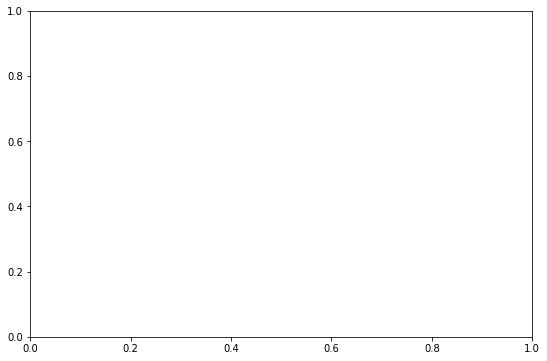

In [723]:
def ICfunc(x,y):
    soln = 100
    return soln


def BCfunc(x):
    soln = 1000*np.sin(x)
    return soln

def Euler_FD(T,IC,BC1,M,N,X):
    '''
    T - time range [0,T]
    IC - initial condition
    BC1 - BC at x=0,1
    M - number spacial nodes in each dimension
    N - number of time nodes
    X - length of square side
    '''
    delta_t = float(T)/N
    delta_x = float(X)/M
    times  = np.arange(0,T+delta_t,delta_t)
    spaces  = np.arange(0,X+delta_x,delta_x)
    mu = delta_t/delta_x**2
    # space x space x time
    u = np.zeros((M+1,M+1,N+1))
    

    for i in range(N+1):
        u[0,:,i] =BC1(times[i])
        u[M,:,i] = BC1(times[i])##############
        u[:,0,i] = BC1(times[i])
        u[:,M,i] = BC1(times[i])
   
    for i in range(1,M):
        for j in range(1,M):
            u[i,j,0] = IC(spaces[i],spaces[j])
            
    for t in range(1,N+1):
        for x in range(1,M):
            for y in range(1,M):
                u[x,y,t] = u[x,y,t-1] + mu*(u[x+1,y,t-1]-4*u[x,y,t-1]+u[x-1,y,t-1] + \
                                                           u[x,y+1,t-1]+u[x,y-1,t-1])
            
    return u

M = Euler_FD(0.3,ICfunc,BCfunc,10,300,4)
T = np.linspace(0,0.3,301)
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.plot(T,M , label='X=1')
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.legend()
plt.show()
M

## AB4 Finite difference

In [18]:
def FD_heat(u,x,y):
    soln = u[x+1,y]-4*u[x,y]+u[x-1,y] +u[x,y+1]+u[x,y-1]
    return soln

f = lambda x : np.sin(x)  

#def ICfunc(x,y):
#    soln = 0
#    return soln

IC = lambda x,y : 2*(x+y)

In [19]:
def Finite_difference_AB4(F,T,IC,BC1,BC2,N,M,X):
    '''
    F - finite difference PDE
    T - time range [0,T]
    IC - initial condition
    BC1 - BC at x=0,1
    BC2 - BC at y=0,1
    N - number spacial nodes in each dimension
    M - time nodes
    X - length of square side
    '''
    AB = np.array([-9./24, 37./24, -59./24, 55./24])
    delta_t = float(T)/M
    delta_x = X/N
    times  = np.linspace(0,T,M+1)
    spaces  = np.linspace(0,1,N+1)
    u = np.zeros((M+1,N+1,N+1))
    X = np.arange(0,X+delta_x,delta_x)
    for i in range(M+1):
        u[i,0,:] = u[i,N,:] = BC1(times[i])
        u[i,:,0] = u[i,:,N] = BC2(times[i])
   
    for i in range(1,N):
        for j in range(1,N):
            u[0,i,j] = IC(X[i],X[j])
            
    for t in range(1,4):
        for x in range(1,N):
            for y in range(1,N):
                u[t,x,y] = u[t-1,x,y] + (delta_t/(delta_x**2))*F(u[t-1,:,:],x,y)
                
    for t in range(4,M+1):
        for x in range(1,N):
            for y in range(1,N):
                u[t,x,y] = u[t-1,x,y] + (delta_t/(delta_x**2))*\
                np.dot(AB,np.array([F(u[t-1,:,:],x,y),F(u[t-2,:,:],x,y),F(u[t-3,:,:],x,y),F(u[t-4,:,:],x,y)]))
            
            
    return u[:,1,1]

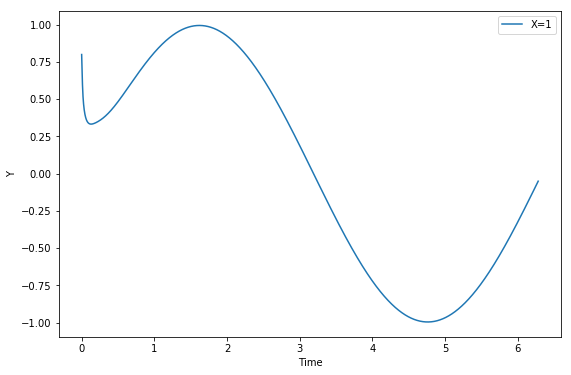

In [20]:
K1 = Finite_difference_AB4(FD_heat,2*np.pi,IC,f,f,10,5000,2)  
#K = Finite_difference_AB4(FD_heat,1,IC,f,f,10,1000,2)   
T = np.linspace(0,2*np.pi,5001)
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
#ax.plot(T,K , label='X=2')
ax.plot(T,K1 , label='X=1')
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.legend()
plt.show()


## RIDC FD 1D

In [508]:
from scipy.interpolate import lagrange

def HOSSEINsolverFD(T, IC,BC, N,L, M):
    '''
    RIDC solver for 1D heat equation
    
    Inputs:
    T:  integration interval[0,T]
    y0: initial condition
    BC: boundary conditions
    N:  number of nodes
    L: number of spacial nodes
    M: the number of points in calculating quadraure integral
    (and also the number of steps used in Adam-Bashforth predictor)
    or number of correction loops PLUS the prection loop

    Output:
    t: time vector
    yy: solution as a function of time
    '''

    # time step and spacial step
    h = float(T)/N
    dx = 1./L
    mu = h/dx**2
    A = np.diagflat((1-2*mu)*np.ones(L+1))+np.diagflat((mu)*np.ones(L),1)+np.diagflat((mu)*np.ones(L),-1)
    A[0,0]=1
    A[-1,-1]=1
    A[0,1]=0
    A[-1,-2]=0
    
    ##### define the semi-discrete system RHS, we will hardcode it for heat eq first (maybe?)
    def func(u):
        v = u.copy()
        for i in range(1,L):
            
            v[i] = (u[i-1]-2*u[i]+u[i+1])/(dx**2)
        return v
    # M: the number of points in calculating quadraure integral
    # (and also the number of steps used in Adam-Bashforth predictor)
    # Note Mm is the number of correctors
    Mm = M - 1
    # Forming the quadraure matrix S[m,i]
    S = np.zeros([Mm, Mm+1])
    for m in range(Mm):  # Calculate qudrature weights
        for i in range(Mm+1):
            x = np.arange(Mm+1)  # Construct a polynomial
            y = np.zeros(Mm+1)   # which equals to 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)
            para = np.array(p)    # Compute its integral
            P = np.zeros(Mm+2)
            for k in range(Mm+1):
                P[k] = para[k]/(Mm+1-k)
            P = np.poly1d(P)
            S[m, i] = P(m+1) - P(m)
    Svec = S[Mm-1, :]
    
    # the time vector
    t = np.arange(0, T+h, h)
    # extended time vector (temporary: cuz I didn't write code for end part)
    t_ext = np.arange(0, T+h+M*h, h)
    # space vector
    X = np.arange(0,1.+dx,dx)
    # the final answer will be stored in yy

    yy = np.zeros([N+1,L+1]) # time x space
    # putting the initial condition in y
    yy[0,1:L] = IC(X[1:L].copy())
    #putting BC in y
    yy[0,0]=BC
    yy[0,L]=BC
    # Value of RHS at initial time
    F0 = func(yy[0,:])

    # F vector and matrice:
    # the RHS of ODE is evaluated and stored in this vector and matrix:
    # F1 [M x M]: first index is the order (0=prection, 1=first correction)
    # second index is the time (iTime)
    # Note F1 could have been [M-1 x M] as the first two rows are equal to each
    # other BUT we designed it as a place holder for future parallelisation
    
    
    
    F1 = np.zeros([Mm, M,L+1])
    F1[:, 0,:] = np.tile(F0,(Mm,1))
    F2 = F0
    # Y2 [M] new set of points derived in each level (prediction and corrections)
    Y2 = np.tile(yy[0,:], (M, 1))

    
    
    # ================== INITIAL PART (1) ==================
    # for this part the predictor and correctors step up to M points in time
    # ** predictor ** uses Runge-Kutta 4
    for iTime in range(0, M-1):

        Y2[0,:] = np.dot(A,Y2[0,:])
        F1[0, iTime+1,:] = func(Y2[0,:])
    
    # ** correctors ** use Integral Deffered Correction
    for iCor in range(1, M-1):
        ll = iCor - 1
        for iTime in range(0, M-1):
            Y2[iCor,1:L] = Y2[iCor,1:L] + h*(F1[iCor,iTime,1:L]-F1[ll,iTime,1:L]) + \
            h * np.dot(S[iTime, :], F1[ll, :,1:L])
            F1[iCor, iTime+1,:] = func(Y2[iCor,:])
        
    # treat the last correction loop a little different
    for iTime in range(0, M-1):
        Y2[M-1,1:L] = Y2[M-1,1:L] + h*(F2[1:L]-F1[M-2, iTime,1:L]) + \
            h * np.dot(S[iTime, :], F1[M-2, :,1:L])
        F2 = func(Y2[M-1,:])
        yy[iTime+1,:] = Y2[M-1,:]

    # ================== INITIAL PART (2) ==================
    
    for iTime in range(M-1, 2*M-2):
        iStep = iTime - (M-1)
        # prediction loop
        Y2[0,:] = np.dot(A,Y2[0,:])
        # correction loops
        for ll in range(iStep):
            iCor = ll + 1
            Y2[iCor,1:L] = Y2[iCor,1:L] + h*(F1[iCor, -1,1:L]-F1[ll, -2,1:L]) + \
                h * np.dot(Svec, F1[ll, :,1:L])
        F1[0, 0:M-1,:] = F1[0, 1:M,:]
        F1[0, M-1,:] = func(Y2[0,:])
        for ll in range(iStep):   #updating stencil
            iCor = ll + 1
            F1[iCor, 0:M-1,:] = F1[iCor, 1:M,:]
            F1[iCor, M-1,:] = func(Y2[iCor,:])

    # ================== MAIN LOOP FOR TIME ==================
    for iTime in range(2*M-2, N+M-1):
        # prediction loop
        Y2[0,:] = np.dot(A,Y2[0,:])
        # correction loops up to the second last one
        for ll in range(M-2):
            iCor = ll + 1
            Y2[iCor,1:L] = Y2[iCor,1:L] + h*(F1[iCor, -1,1:L]-F1[ll, -2,1:L]) + \
                h * np.dot(Svec, F1[ll, :,1:L])
        # last correction loop
        Y2[M-1,1:L] = Y2[M-1,1:L] + h * (F2[1:L]-F1[M-2, -2,1:L]) + \
            h * np.dot(Svec, F1[M-2, :,1:L])
        
        # ~~~~~~~~~~~ Updating Stencil ~~~~~~~~~~~
        # ---> updating correctors stencil
        for ll in range(1, M-1):
            F1[ll, 0:M-1,:] = F1[ll, 1:M,:]
            F1[ll, M-1,:] = func(Y2[ll,:])
        # storing the final answer
        yy[iTime+1-(M-1),:] = Y2[M-1,:]
        F2 = func(Y2[M-1,:])
        # ---> updating predictor stencil
        # ** approach #0:
        F1[0, 0:M-1,:] = F1[0, 1:M,:]
        # ** approach #1: pushing the most correct answer to predictor
        # F1[0, 0] = F2
        # F1[0, 1:M-1] = F1[0, 2:M]
        # ** approach #2 : pushing the recently corrected answer of
        # each corrector to the associated node in predictor
        # F1[0, 0] = F2
        # for ii in range(1, M-1):
        #     F1[0, ii] = F1[-ii, -1]

        F1[0, M-1,:] = func(Y2[0,:])

    return t, yy



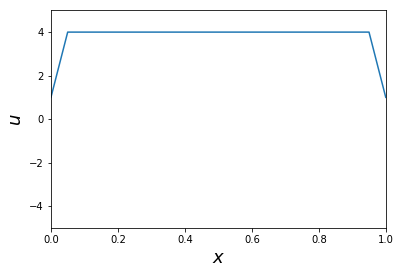

In [849]:
def ICfunc1D2(x):
    soln =4
    return soln

U = HOSSEINsolverFD(0.3, ICfunc1D2,1, 300,20, 4)[1]


x = np.arange(0,1.05,0.05)
fig, ax = plt.subplots()
ax.set_xlabel(r'$x$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('$u$', fontsize=18)
ax.axis([0,1,-5,5])
l, = ax.plot([],[])
def animate(i):
    l.set_data(x, U[i,:])

ani = animation.FuncAnimation(fig, animate, frames=100)

from IPython.display import HTML
HTML(ani.to_jshtml())  

### Convergence

In [410]:
U_exact = np.zeros((21,301))
U_exact[:,0] = np.sin(2*np.pi*x)+2*np.sin(5*np.pi*x)
dt = 0.3/300

for n in range(300):
    U_exact[:,n+1] = np.exp(-4*np.pi**2*(n+1)*dt)*np.sin(2*np.pi*x)+2*np.exp(-25*np.pi**2*(n+1)*dt)*np.sin(5*np.pi*x)
    
    
U = HOSSEINsolverFD(0.3, ICfunc1D,0, 300,20, 4)[1]

U_exact,U



(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.72323056e+00,  1.40204206e+00,  1.14893095e+00, ...,
          2.40267598e-06,  2.30967007e-06,  2.22026436e-06],
        [ 2.58778525e+00,  2.12771996e+00,  1.76415654e+00, ...,
          4.57016129e-06,  4.39325355e-06,  4.22319378e-06],
        ...,
        [ 1.41221475e+00,  9.97654964e-01,  6.77835566e-01, ...,
         -4.57016129e-06, -4.39325355e-06, -4.22319378e-06],
        [ 1.10519657e+00,  8.07931738e-01,  5.77818221e-01, ...,
         -2.40267598e-06, -2.30967007e-06, -2.22026436e-06],
        [ 9.79717439e-16,  7.21421783e-16,  5.21310176e-16, ...,
         -1.90438034e-21, -1.83066311e-21, -1.75979942e-21]]),
 array([[ 0.00000000e+00,  1.72323056e+00,  2.58778525e+00, ...,
          1.41221475e+00,  1.10519657e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.41602161e+00,  2.14753693e+00, ...,
          1.01710615e+00,  8.21718975e

### RIDC 2D

In [862]:
def HOSSEINsolverFD2D(T, IC,BC, N,L, M):
    '''
    RIDC solver for 2D heat equation
    
    Inputs:
    T:  integration interval[0,T]
    y0: initial condition
    BC: boundary conditions
    N:  number of nodes
    L: number of spacial nodes
    M: the number of points in calculating quadraure integral
    (and also the number of steps used in Adam-Bashforth predictor)
    or number of correction loops PLUS the prection loop

    Output:
    t: time vector
    yy: solution as a function of time
    '''

    # time step and spacial step 
    h = float(T)/N
    dx = 1./L
    mu = h/dx**2
    
    
    ## need 3d matrix that does the same thing, write out FD work out
    #A = np.diagflat((1-4*mu)*np.ones(L+1,L+1))+np.diagflat((mu)*np.ones(L,L),1)+np.diagflat((mu)*np.ones(L,L),-1)
    #A[0,0,:]=1
    #A[-1,-1,:]=1
    #A[0,1,:]=0
    #A[-1,-2,:]=0
    #needs to incorperate values above and below not just either side 
    
    
    ##### define the semi-discrete system RHS, we will hardcode it for heat eq first (maybe?)
    def func(u):
        v = u.copy()
        for i in range(1,L):
            for j in range(1,L):
                v[i,j] = (u[i-1,j]-2*u[i,j]+u[i+1,j])/(dx**2)+(u[i,j-1]-2*u[i,j]+u[i,j+1])/(dx**2)
        return v
    # M: the number of points in calculating quadraure integral
    # (and also the number of steps used in Adam-Bashforth predictor)
    # Note Mm is the number of correctors
    Mm = M - 1
    # Forming the quadraure matrix S[m,i]
    S = np.zeros([Mm, Mm+1])
    for m in range(Mm):  # Calculate qudrature weights
        for i in range(Mm+1):
            x = np.arange(Mm+1)  # Construct a polynomial
            y = np.zeros(Mm+1)   # which equals to 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)
            para = np.array(p)    # Compute its integral
            P = np.zeros(Mm+2)
            for k in range(Mm+1):
                P[k] = para[k]/(Mm+1-k)
            P = np.poly1d(P)
            S[m, i] = P(m+1) - P(m)
    Svec = S[Mm-1, :]
    
    # the time vector
    t = np.arange(0, T+h, h)
    # extended time vector (temporary: cuz I didn't write code for end part)
    t_ext = np.arange(0, T+h+M*h, h)
    # space vector
    X = np.arange(0,1+dx,dx)
  
    # the final answer will be stored in yy

    yy = np.zeros([N+1,L+1,L+1]) # time x space
    # putting the initial condition in y
    for i in range(1,L):
        for j in range(1,L):
            yy[0,i,j] = IC(X[i],X[j])
    #putting BC in y
    yy[0,0,:]=BC
    yy[0,L,:]=BC
    yy[0,:,0]=BC
    yy[0,:,L]=BC
    # Value of RHS at initial time
    F0 = func(yy[0,:,:])

    # F vector and matrice:
    # the RHS of ODE is evaluated and stored in this vector and matrix:
    # F1 [M x M]: first index is the order (0=prection, 1=first correction)
    # second index is the time (iTime)
    # Note F1 could have been [M-1 x M] as the first two rows are equal to each
    # other BUT we designed it as a place holder for future parallelisation
    
    
    
    F1 = np.zeros([Mm, M,L+1,L+1])
    F1[:, 0,:,:] = np.tile(F0,(Mm,1,1))
    F2 = F0
    # Y2 [M] new set of points derived in each level (prediction and corrections)
    Y2 = np.tile(yy[0,:,:], (M, 1,1))
    
    

    # ================== INITIAL PART (1) ==================
    # for this part the predictor and correctors step up to M points in time
    # ** predictor ** uses Runge-Kutta 4
    for iTime in range(0, M-1):

        Y2[0,1:L,1:L] = Y2[0,1:L,1:L] + h*F1[0, iTime,1:L,1:L]
        F1[0, iTime+1,:,:] = func(Y2[0,:,:])

    # ** correctors ** use Integral Deffered Correction
    for iCor in range(1, M-1):
        ll = iCor - 1
        for iTime in range(0, M-1):
            
            s = np.zeros((L-1,L-1)) 
            for i in range(1,L-1):  
                for j in range(1,L-1):
                    s[i,j] = np.dot(S[iTime,:],F1[ll, :,i,j])
            
             
            
            Y2[iCor,1:L,1:L] = Y2[iCor,1:L,1:L] + h*(F1[iCor,iTime,1:L,1:L]-F1[ll,iTime,1:L,1:L]) + \
            h * s
            F1[iCor, iTime+1,:,:] = func(Y2[iCor,:,:])
            
    #print(F1)    
    # treat the last correction loop a little different
    for iTime in range(0, M-1):
        s = np.zeros((L-1,L-1))
        for i in range(1,L-1):
            for j in range(1,L-1):
                s[i,j] = np.dot(S[iTime,:],F1[M-2, :,i,j])
         
        Y2[M-1,1:L,1:L] = Y2[M-1,1:L,1:L] + h*(F2[1:L,1:L]-F1[M-2, iTime,1:L,1:L]) + \
            h * s
        F2 = func(Y2[M-1,:,:])

        yy[iTime+1,:,:] = Y2[M-1,:,:]
    print(yy)
    # ================== INITIAL PART (2) ==================

    for iTime in range(M-1, 2*M-2):
        iStep = iTime - (M-1)
        # prediction loop
        Y2[0,1:L,1:L] = Y2[0,1:L,1:L] + h*F1[0, -1,1:L,1:L] 

        # correction loops
        for ll in range(iStep):
            iCor = ll + 1
            
            s = np.zeros((L-1,L-1))
            for i in range(1,L-1):
                for j in range(1,L-1):
                    s[i,j] = np.dot(Svec,F1[ll, :,i,j])
                    
            Y2[iCor,1:L,1:L] = Y2[iCor,1:L,1:L] + h*(F1[iCor, -1,1:L,1:L]-F1[ll, -2,1:L,1:L]) + \
                h * s
        F1[0, 0:M-1,:,:] = F1[0, 1:M,:,:]
        F1[0, M-1,:,:] = func(Y2[0,:,:])
        for ll in range(iStep):   #updating stencil
            iCor = ll + 1
            F1[iCor, 0:M-1,:,:] = F1[iCor, 1:M,:,:]
            F1[iCor, M-1,:,:] = func(Y2[iCor,:,:])

    # ================== MAIN LOOP FOR TIME ==================
    for iTime in range(2*M-2, N+M-1):
        # prediction loop
        Y2[0,1:L,1:L] = Y2[0,1:L,1:L] + h*F1[0, -1,1:L,1:L] 
        # correction loops up to the second last one
        for ll in range(M-2):
            iCor = ll + 1
            
            s = np.zeros((L-1,L-1))
            for i in range(1,L-1):
                for j in range(1,L-1):
                    s[i,j] = np.dot(Svec,F1[ll, :,i,j])
                    
            Y2[iCor,1:L,1:L] = Y2[iCor,1:L,1:L] + h*(F1[iCor, -1,1:L,1:L]-F1[ll, -2,1:L,1:L]) + \
                h * s
        #print(Y2[1,:,:])
        # last correction loop
        s = np.zeros((L-1,L-1))
        for i in range(1,L-1):
            for j in range(1,L-1):
                s[i,j] = np.dot(Svec,F1[M-2, :,i,j])
                
        Y2[M-1,1:L,1:L] = Y2[M-1,1:L,1:L] + h * (F2[1:L,1:L]-F1[M-2, -2,1:L,1:L]) + \
            h * s
        
        # ~~~~~~~~~~~ Updating Stencil ~~~~~~~~~~~
        # ---> updating correctors stencil
        for ll in range(1, M-1):
            F1[ll, 0:M-1,:,:] = F1[ll, 1:M,:,:]
            F1[ll, M-1,:,:] = func(Y2[ll,:,:])
        # storing the final answer
        yy[iTime+1-(M-1),:,:] = Y2[M-1,:,:]
        F2 = func(Y2[M-1,:,:])
        # ---> updating predictor stencil
        # ** approach #0:
        F1[0, 0:M-1,:,:] = F1[0, 1:M,:,:]
        # ** approach #1: pushing the most correct answer to predictor
        # F1[0, 0] = F2
        # F1[0, 1:M-1] = F1[0, 2:M]
        # ** approach #2 : pushing the recently corrected answer of
        # each corrector to the associated node in predictor
        # F1[0, 0] = F2
        # for ii in range(1, M-1):
        #     F1[0, ii] = F1[-ii, -1]

        F1[0, M-1,:,:] = func(Y2[0,:,:])

    return t, yy

HOSSEINsolverFD2D(0.3, ICfunc,10, 300,5, 4)[1][:,3,4]


[[[ 1.00000000e+01  1.00000000e+01  1.00000000e+01  1.00000000e+01
    1.00000000e+01  1.00000000e+01]
  [ 1.00000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  1.00000000e+01]
  [ 1.00000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  1.00000000e+01]
  [ 1.00000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  1.00000000e+01]
  [ 1.00000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  1.00000000e+01]
  [ 1.00000000e+01  1.00000000e+01  1.00000000e+01  1.00000000e+01
    1.00000000e+01  1.00000000e+01]]

 [[ 1.00000000e+01  1.00000000e+01  1.00000000e+01  1.00000000e+01
    1.00000000e+01  1.00000000e+01]
  [ 1.00000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  1.00000000e+01]
  [ 1.00000000e+01  0.00000000e+00  4.99991412e-01  2.56245470e-01
    2.53183813e-01  1.00000000e+01]
  [ 1.00000000e+01  0.00000000e+00  2.56245470e-01 -1.86368702e-02
   -

array([ 0.00000000e+00, -3.47385894e-03, -1.50081741e-02, -3.58110318e-02,
       -6.64513833e-02, -1.06895137e-01, -1.56574973e-01, -2.14480069e-01,
       -2.79252328e-01, -3.49281245e-01, -4.22792185e-01, -4.97925114e-01,
       -5.72802305e-01, -6.45584636e-01, -7.14516794e-01, -7.77962133e-01,
       -8.34428218e-01, -8.82584171e-01, -9.21271006e-01, -9.49506081e-01,
       -9.66482729e-01, -9.71566049e-01, -9.64285715e-01, -9.44326552e-01,
       -9.11517544e-01, -8.65819809e-01, -8.07313995e-01, -7.36187477e-01,
       -6.52721647e-01, -5.57279519e-01, -4.50293847e-01, -3.32255863e-01,
       -2.03704739e-01, -6.52178246e-02,  8.25983165e-02,  2.39116048e-01,
        4.03694001e-01,  5.75683633e-01,  7.54435032e-01,  9.39302003e-01,
        1.12964649e+00,  1.32484238e+00,  1.52427871e+00,  1.72736235e+00,
        1.93352023e+00,  2.14220112e+00,  2.35287695e+00,  2.56504392e+00,
        2.77822318e+00,  2.99196125e+00,  3.20583027e+00,  3.41942800e+00,
        3.63237758e+00,  

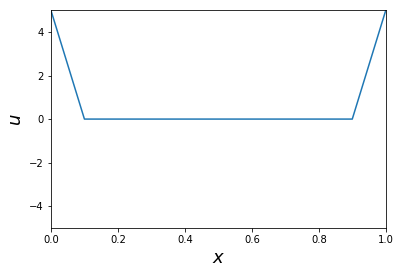

In [860]:
def ICfunc(x,y):
    soln = 0
    return soln


def BCfunc(x):
    soln = 5
    return soln

U = HOSSEINsolverFD2D(0.3, ICfunc,5, 300,10, 4)[1][:,1,:]
M = Euler_FD(0.3,ICfunc,BCfunc,10,300,4)[9,1,:]





x = np.arange(0,1.1,0.1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$x$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('$u$', fontsize=18)
ax.axis([0,1,-5,5])
l, = ax.plot([],[])
def animate(i):
    l.set_data(x, U[i,:])

ani = animation.FuncAnimation(fig, animate, frames=100)

from IPython.display import HTML
HTML(ani.to_jshtml())  

IndexError: too many indices for array

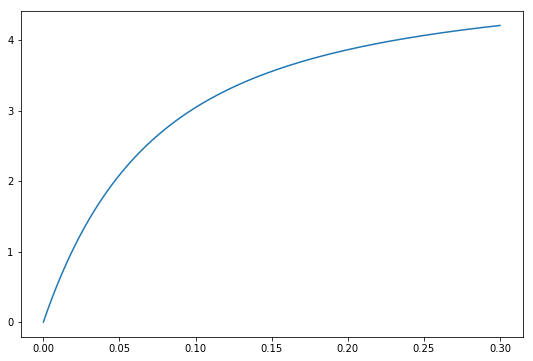

In [850]:
T = np.linspace(0,0.3,301)
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.plot(T,M , label='Eu')
ax.plot(T,U[:,1,1],label='RIDC')
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.legend()
plt.show()

In [677]:

U = HOSSEINsolverFD2D(0.3, ICfunc,0, 300,10, 4)[1]

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    #plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

def animate(k):
    plotheatmap(U[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=0.3, frames=300, repeat=False)
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0.

<Figure size 432x288 with 0 Axes>

In [646]:
F1 = np.ones((3,4,10,10))
A = np.array([1,2,3,4],dtype = float)
F1[2, :,1:10,1:10]


s = np.zeros((10,10))
for i in range(1,9):
    for j in range(1,9):
        s[i,j] = np.dot(A,F1[2, :,i,j])
        
s

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [ 0., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [ 0., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [ 0., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [ 0., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [ 0., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [ 0., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [ 0., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])